In [31]:
import pandas as pd
import numpy as np

In [32]:
# https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction
df = pd.read_csv("airline_passenger_satisfaction.csv", index_col=0)
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [33]:
print(df.columns
, df.shape, sep='\n')

Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')
(129880, 23)


In [34]:
df.dtypes

Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

In [35]:
df.isna().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.isna().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [38]:
df.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

In [39]:
df["satisfaction"] = df["satisfaction"].map({"neutral or dissatisfied":0, "satisfied":1})
df.satisfaction

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129487, dtype: int64

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def apply_pca_95_variance(data, target_column, output_file):
    # Separate the target column from the dataset
    target_data = data[target_column]
    features_data = data.drop(columns=[target_column])

    # Keep only numeric columns in the feature data
    numeric_data = features_data.select_dtypes(include=[float, int])

    # Standardize the numeric data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # Apply PCA
    pca = PCA()
    pca.fit(scaled_data)

    # Find the number of components that explain 95% variance
    cumulative_variance = pca.explained_variance_ratio_.cumsum()
    n_components = (cumulative_variance < 0.95).sum() + 1

    print(f"Number of components selected to explain 95% variance: {n_components}")

    # Apply PCA with the selected number of components
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(scaled_data)
    # Create a DataFrame for the reduced data, with component names (PC1, PC2, etc.)
    pc_columns = [f"PC{i+1}" for i in range(n_components)]
    reduced_df = pd.DataFrame(reduced_data, columns=pc_columns)
    reduced_df[target_column] = target_data.reset_index(drop=True)

    # Save the reduced dataset to a CSV file
    reduced_df.to_csv(output_file, index=False)
    print(f"Reduced dataset saved to {output_file}")


apply_pca_95_variance(df, "satisfaction", "cleared_data.csv")

Number of components selected to explain 95% variance: 14
Reduced dataset saved to cleared_data.csv


In [42]:
df_cleared = pd.read_csv("cleared_data.csv")
df_cleared.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,satisfaction
0,-2.107218,1.229091,0.223751,0.348002,1.914525,-0.164536,-1.460678,0.284759,0.499163,-1.334876,-0.118785,0.158860,0.587714,0.378808,0
1,3.322532,-1.240282,-1.249509,-0.547083,0.120780,-2.184259,-0.215917,-0.598495,-1.225080,0.197218,-1.022044,-0.658265,0.817020,-0.397993,0
2,-2.131572,1.921717,0.900005,-0.420216,0.396450,-0.264745,-1.063280,0.350505,0.516470,-0.006766,0.180255,-0.449548,-0.015327,-0.588014,1
3,1.875089,-2.497899,-0.828422,-0.284761,1.412064,-0.912137,1.280548,0.195084,-1.297452,-0.305727,-0.410752,-0.778392,0.729156,-0.569824,0
4,-0.775237,-0.234988,0.946643,-0.562884,-0.829757,0.192521,-0.050671,-1.641006,-0.474932,0.139951,-0.439908,-0.708690,-0.546055,-0.822943,1


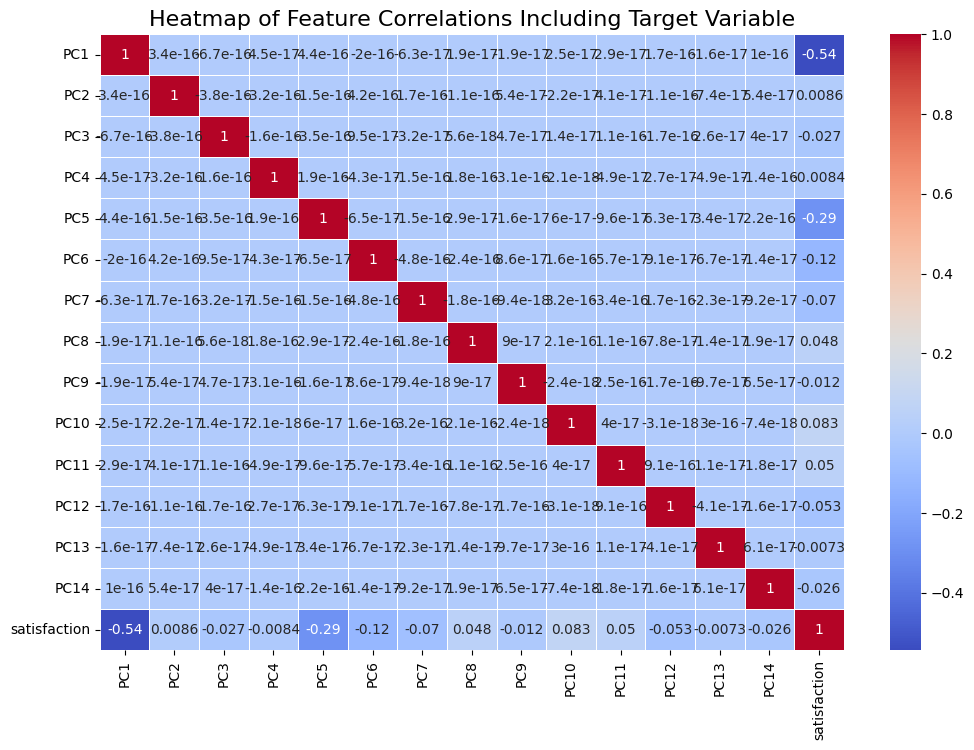

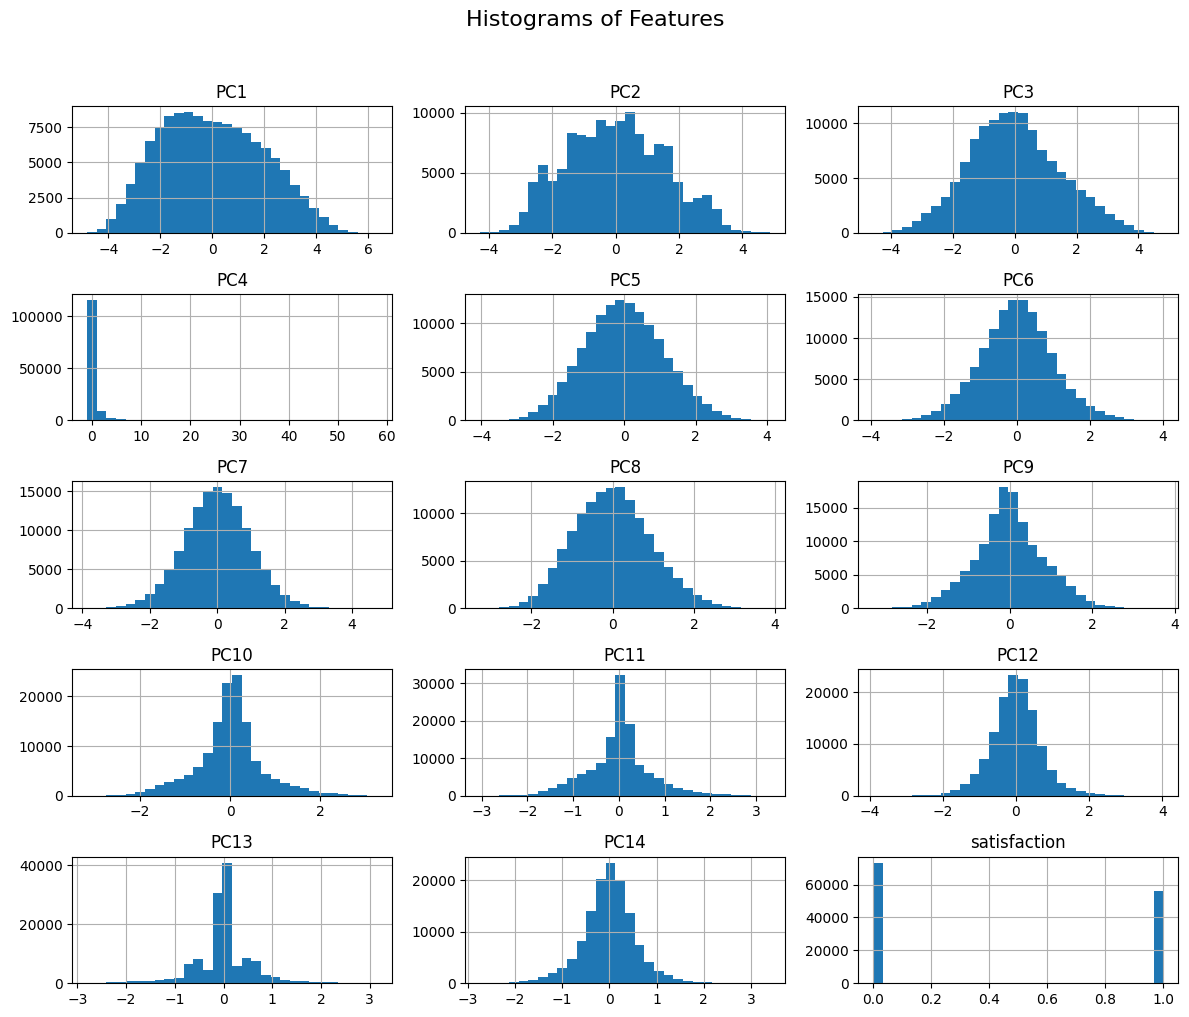

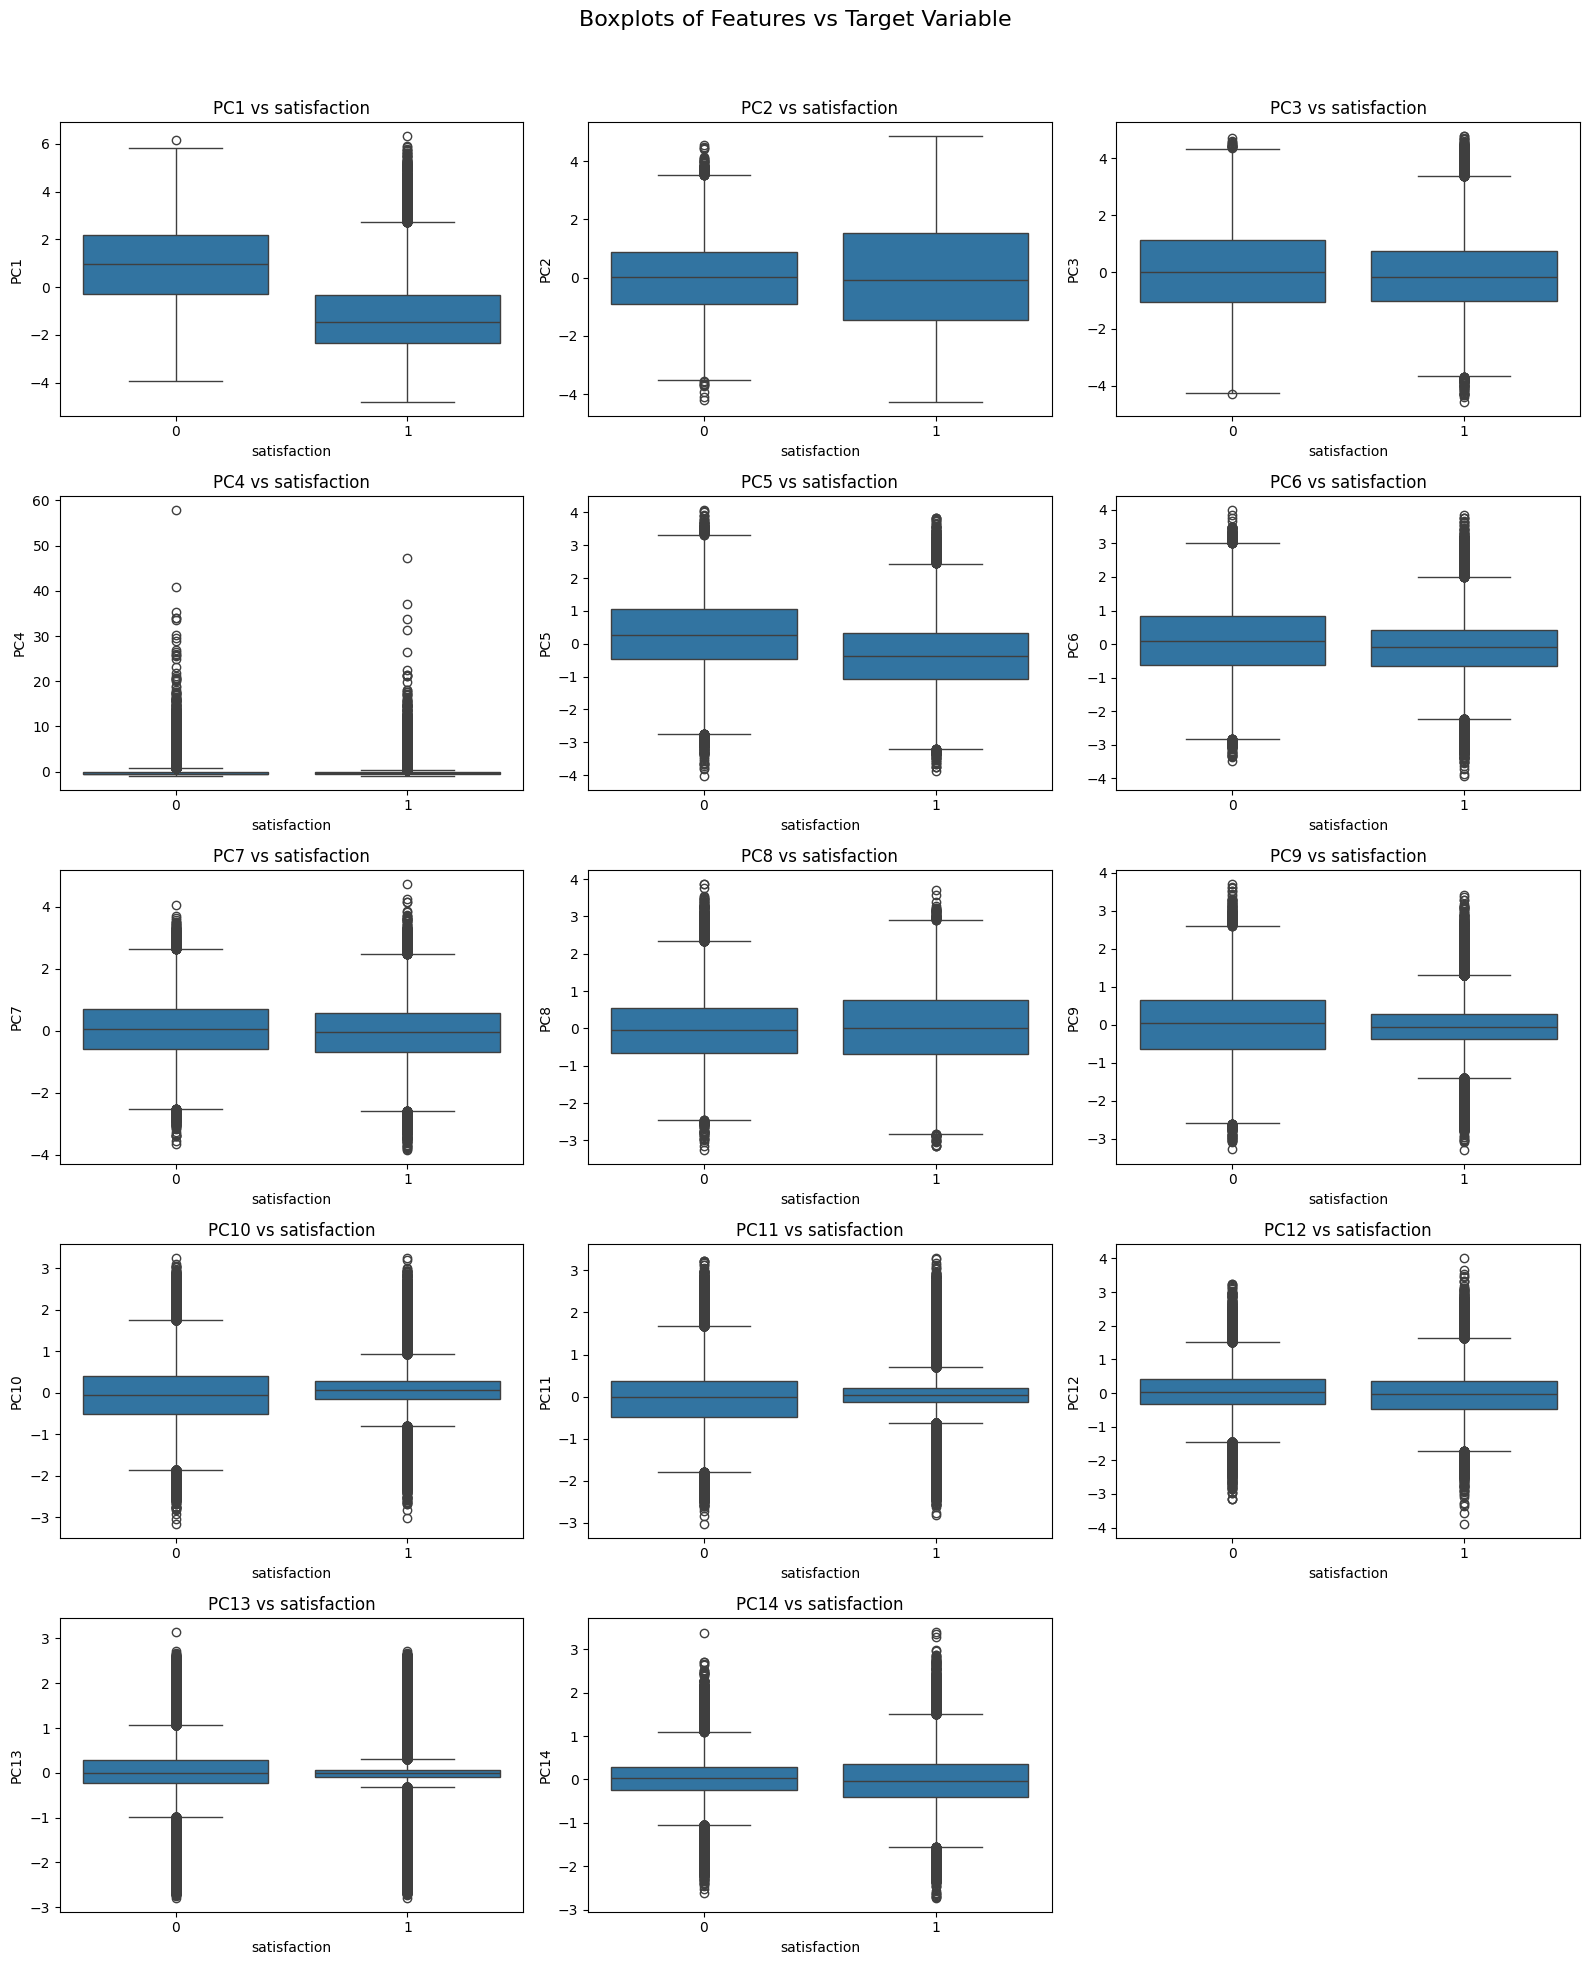

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Function to visualize correlations, histograms, and boxplots
def visualize_data(data, target_column):
    # Part 1: Correlation Heatmap
    plt.figure(figsize=(12, 8))

    # Compute the correlation matrix (including the target variable)
    corr_matrix = data.corr()

    # Plot the heatmap of correlations
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap of Feature Correlations Including Target Variable", fontsize=16)
    plt.show()

    # Part 2: Histograms of Features
    numeric_columns = data.select_dtypes(include=[float, int]).columns

    # Plot histograms for each numeric feature
    data[numeric_columns].hist(
        bins=30, figsize=(12, 12), layout=(len(numeric_columns) // 3 + 1, 3)
    )
    plt.suptitle("Histograms of Features", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Part 3: Boxplots of Features Relative to Target Variable (in grid layout)
    num_plots = len(numeric_columns) - 1  # Exclude the target column
    cols = 3  # Number of columns in the grid
    rows = math.ceil(num_plots / cols)  # Calculate the required number of rows

    plt.figure(figsize=(16, rows * 4))

    # Create a subplot for each numeric feature (excluding the target column)
    plot_idx = 1
    for column in numeric_columns:
        if column != target_column:
            plt.subplot(rows, cols, plot_idx)
            sns.boxplot(x=data[target_column], y=data[column])
            plt.title(f"{column} vs {target_column}")
            plot_idx += 1

    plt.suptitle("Boxplots of Features vs Target Variable", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


visualize_data(df_cleared, "satisfaction")

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Step 1: Load the dataset and split it into train and test sets
def load_data(input_file, target_column):
    # Load dataset
    data = pd.read_csv(input_file).sample(n=10000)

    # Split into features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test


# Step 2: Train and tune classifiers
def train_classifiers(X_train, y_train):
    models = {}

    # k-Nearest Neighbors with GridSearchCV to find optimal 'n_neighbors'
    knn_params = {"n_neighbors": range(1, 10)}
    knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
    knn.fit(X_train, y_train)
    models["kNN"] = knn.best_estimator_
    print(f"Best kNN parameters: {knn.best_params_}")

    # Decision Tree
    tree = DecisionTreeClassifier(random_state=42, max_depth=10)
    tree.fit(X_train, y_train)
    models["Decision Tree"] = tree

    # SVM with GridSearchCV to find optimal 'C' and 'gamma'
    svm_params = {"C": [0.1, 1, 10], "gamma": [1, 0.1, 0.01]}
    svm = GridSearchCV(SVC(), svm_params, cv=5)
    svm.fit(X_train, y_train)
    models["SVM"] = svm.best_estimator_
    print(f"Best SVM parameters: {svm.best_params_}")

    # Random Forest
    rf = RandomForestClassifier(random_state=42, max_depth=10, n_jobs=8)
    rf.fit(X_train, y_train)
    models["Random Forest"] = rf

    # AdaBoost
    adaboost = AdaBoostClassifier(random_state=42)
    adaboost.fit(X_train, y_train)
    models["AdaBoost"] = adaboost

    return models


# Step 3: Evaluate classifiers using test data
def evaluate_classifiers(models, X_test, y_test):
    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}")

        # Predictions
        y_pred = model.predict(X_test)

        # Display classification report and confusion matrix
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))


# Step 4: Select the best model (based on accuracy or any other metric)
def select_best_model(models, X_test, y_test):
    best_model = None
    best_accuracy = 0

    for model_name, model in models.items():
        accuracy = model.score(X_test, y_test)
        print(f"{model_name} Accuracy: {accuracy:.4f}")

        if accuracy > best_accuracy:
            best_model = model
            best_accuracy = accuracy

    print(
        f"\nBest Model: {best_model.__class__.__name__} with accuracy {best_accuracy:.4f}"
    )
    return best_model


# Main function to load data, train classifiers, evaluate, and select the best model
def main(input_file, target_column):
    X_train, X_test, y_train, y_test = load_data(input_file, target_column)

    # Train classifiers and optimize parameters
    models = train_classifiers(X_train, y_train)

    # Evaluate classifiers
    evaluate_classifiers(models, X_test, y_test)

    # Select the best model
    best_model = select_best_model(models, X_test, y_test)


# Example usage:
# Assuming 'data.csv' contains the dataset with features and a target column named 'target'
input_file = "cleared_data.csv"
target_column = "satisfaction"  # Specify the target column name

# Run the pipeline
main(input_file, target_column)

Best kNN parameters: {'n_neighbors': 5}
Best SVM parameters: {'C': 1, 'gamma': 0.1}

Evaluating kNN
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1168
           1       0.88      0.84      0.86       832

    accuracy                           0.89      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000

Confusion Matrix:
[[1076   92]
 [ 134  698]]

Evaluating Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1168
           1       0.83      0.80      0.81       832

    accuracy                           0.85      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.85      0.85      2000

Confusion Matrix:
[[1029  139]
 [ 169  663]]

Evaluating SVM
Classification Report:
              precision    recall  f1-score  